# Kidney Disease

In [1]:
#utilities
import pandas as pd
import numpy as np
#plotting
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('classic')
plt.style.use('ggplot')
sns.set_style("darkgrid")
#scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#hide warnings
import warnings
warnings.filterwarnings('ignore')

## EDA

### Descriptive

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.shape

(400, 26)

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


**Observations**
* We can see that our dataset has 26 features, and 400 observations
* Straight away we can notice `Nan` values  in few columns
* Features distributed on different scales

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

* Some numerical features has been marked as `object` type i.e. `pcv`

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
rbc,248,2,normal,201
pc,335,2,normal,259
pcc,396,2,notpresent,354
ba,396,2,notpresent,374
pcv,330,44,41,21
wc,295,92,9800,11
rc,270,49,5.2,18
htn,398,2,no,251
dm,398,5,no,258
cad,398,3,no,362


**Observations**:
* Dependent variable seem to have 3 classes, though it should have 2
* `pcv`, `wc`, `rc` placed in wrong dtype

In [7]:
df[['pcv', 'wc', 'rc']].head(10)

,pcv,wc,rc
0,44,7800,5.2
1,38,6000,NaN
2,31,7500,NaN
3,32,6700,3.9
4,35,7300,4.6
5,39,7800,4.4
6,36,NaN,NaN
7,44,6900,5
8,33,9600,4.0
9,29,12100,3.7


In [8]:
df.pcv = pd.to_numeric(df.pcv, errors='coerce')
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')

df[['pcv', 'wc', 'rc']].dtypes

pcv    float64
wc     float64
rc     float64
dtype: object

In [9]:
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [10]:
df.loc[df.classification == 'ckd\t']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
37,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28.0,6900.0,2.5,yes,yes,no,poor,no,yes,ckd\t
230,230,65.0,60.0,1.01,2.0,0.0,normal,abnormal,present,notpresent,...,NaN,9500.0,NaN,yes,yes,no,poor,no,no,ckd\t


**Observation**: 
* After dataset inspection, it was indicated that 3rd class '`ckd\t`' is a machine error, therefore will be assigned to '`ckd`'
* Also we should double check other categorical features whether they also have '`\t`' typo (specifically `dm` and `cad` variables - cause it seems they should have only `yes` or `no` values)

In [11]:
print(df.dm.value_counts())
print('\n')
print(df.cad.value_counts())


no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64


no      362
yes      34
\tno      2
Name: cad, dtype: int64


In [12]:
df.classification.mask(df.classification == 'ckd\t', 'ckd', inplace= True)
df.cad.mask(df.cad == '\tno', 'no', inplace= True)
df.dm.mask(df.dm == '\tyes', 'yes', inplace= True)
df.dm.mask(df.dm == ' yes', 'yes', inplace= True)
df.dm.mask(df.dm == '\tno', 'no', inplace= True)

print(df.classification.value_counts())
print('\n')
print(df.dm.value_counts())
print('\n')
print(df.cad.value_counts())


ckd       250
notckd    150
Name: classification, dtype: int64


no     261
yes    137
Name: dm, dtype: int64


no     364
yes     34
Name: cad, dtype: int64


**Observations**:
* Number of missing values highly distribute across features
* i.e. some has only few, others more than 100
* Since dataset is pretty small (only 400 observarions) - we should try to avoid dropping

### Univariate

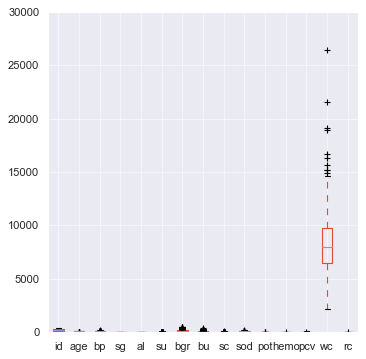

In [13]:
plt.figure(figsize=(5,5))
df.boxplot();

* Dataset includes outliers in some numerical columns

In [14]:
# lets divide numeric and categorical features
numeric_features = df.describe().keys()
cat_features = df.describe(include='object').keys()

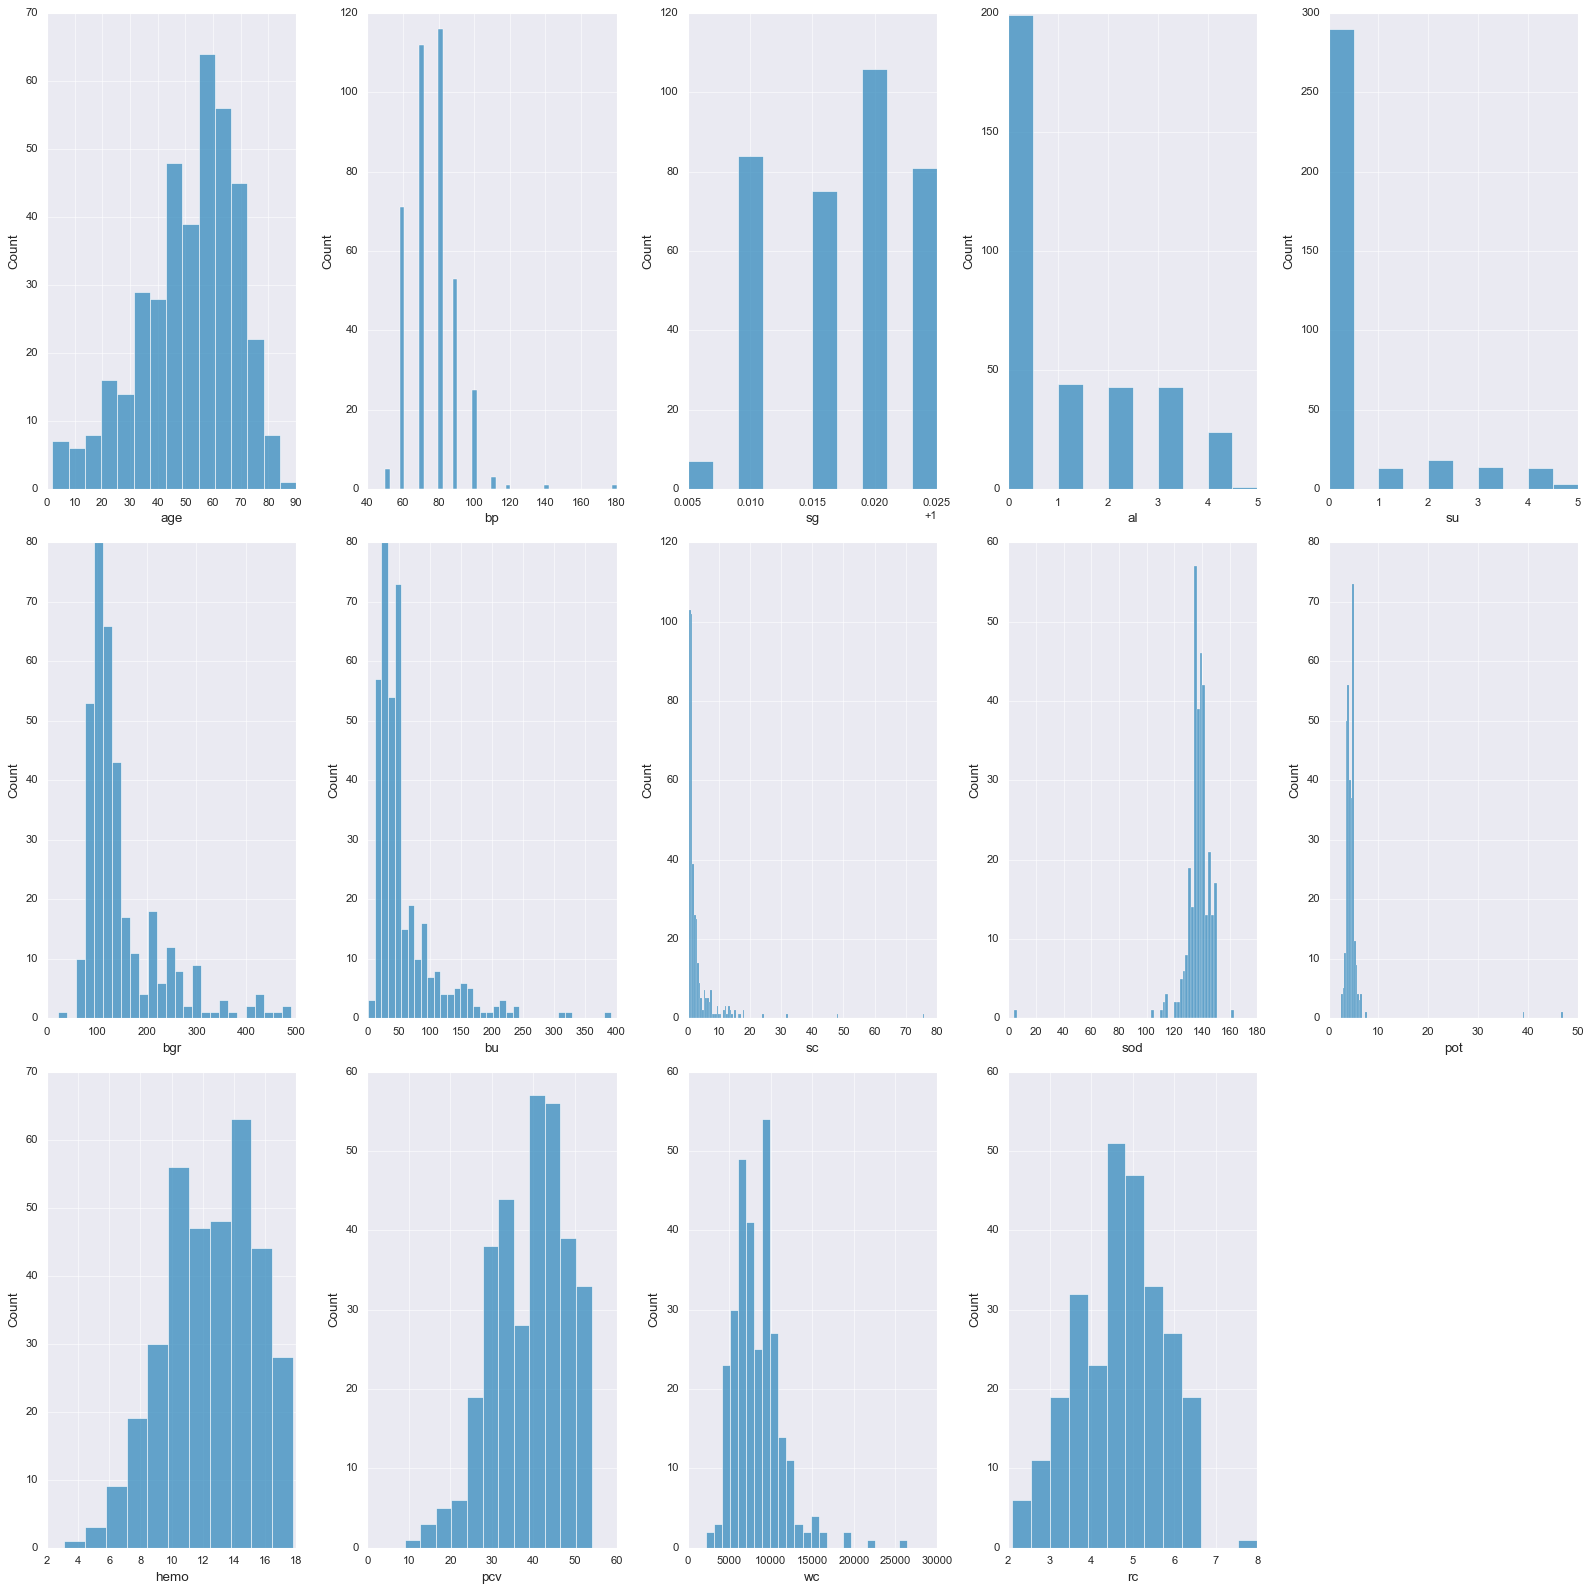

In [15]:
plt.figure(figsize = (20, 20))
# plot all numerical features beside ID one
for i, column in enumerate(numeric_features[1:]):
    ax = plt.subplot(3, 5, i+1)
    sns.histplot(x=df[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**Observations**:
* Some numeric features are skewed 

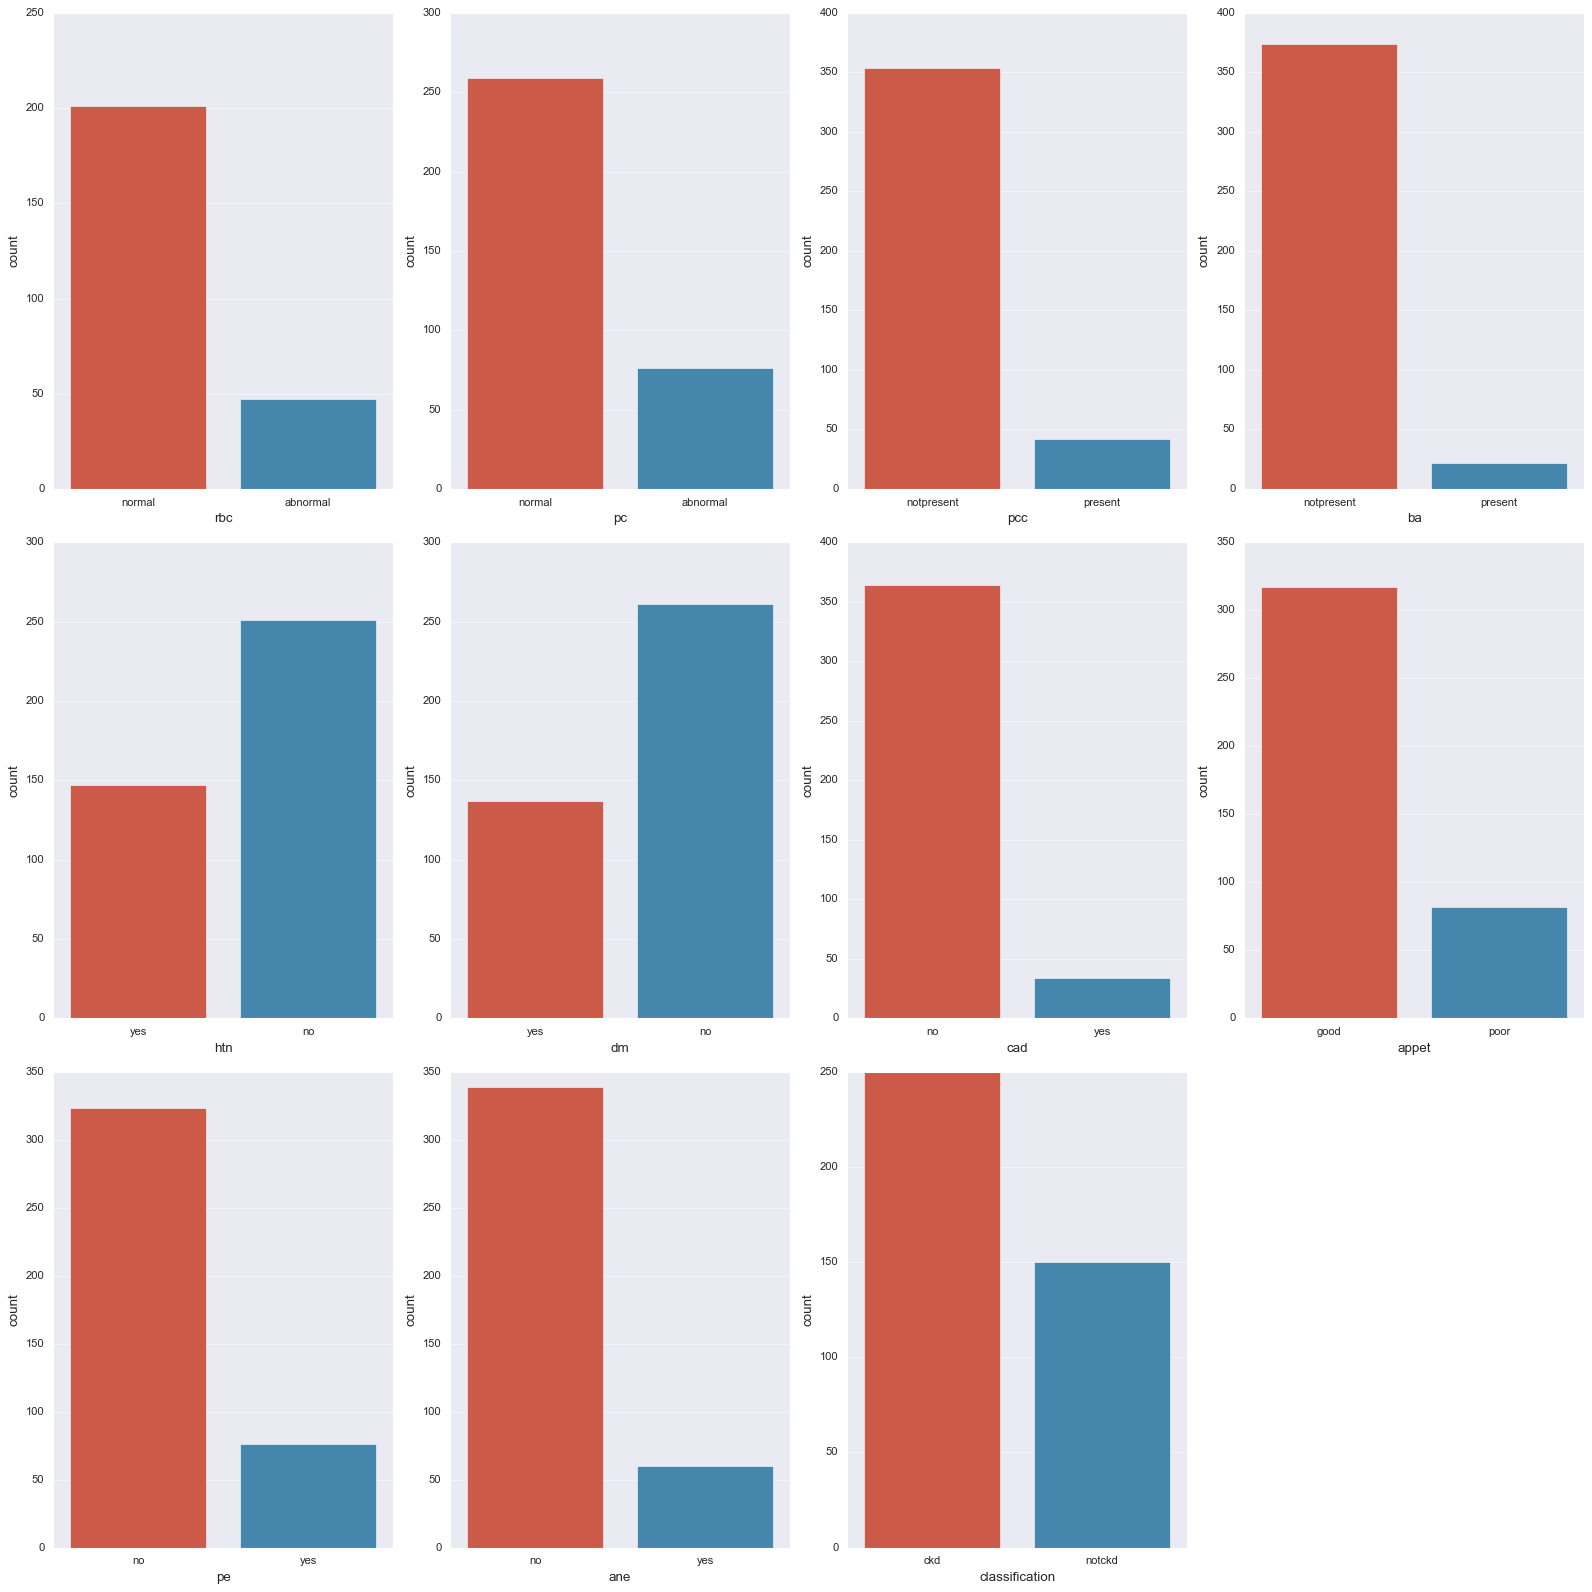

In [23]:
plt.figure(figsize = (20, 20))
# plot categorical features
for i, column in enumerate(cat_features):
    ax = plt.subplot(3, 4, i+1)
    sns.countplot(x=df[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**Observations**:
* Small class inbalance is present in dependent feature, however, it shoudn't be a problem

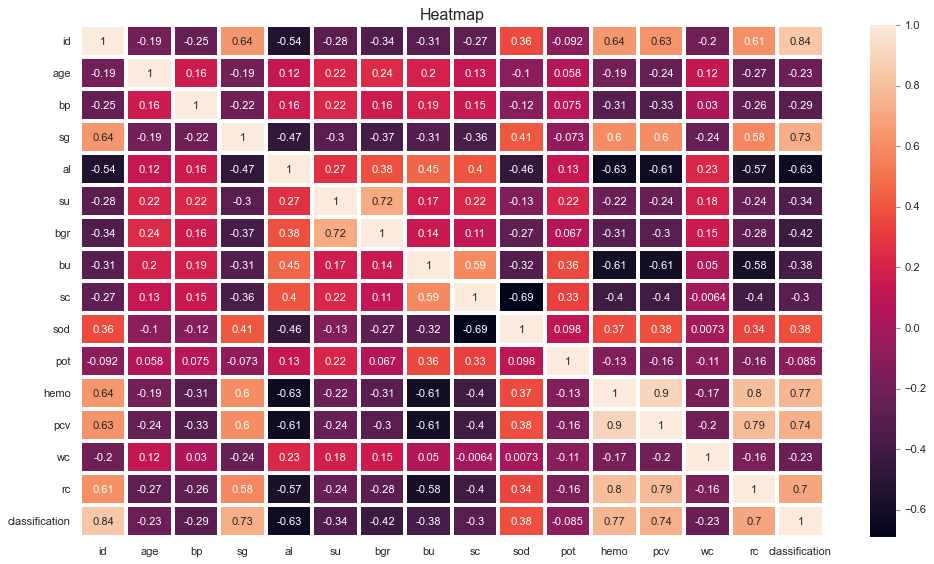

In [16]:
#plot correlation map
plt.figure(figsize=(15,8))
df.classification = df.classification.astype('category').cat.codes
sns.heatmap(df.corr(), annot=True, linewidths=2).set_title('Heatmap');

**Observations**:
* Interesting thing - around 6 features including target Y are some-what-correlated with `id` column -> logically, it shouldn't affect on prediction in this case -> drop it?
* `pcv` and `hemo` both have almost identical correlations with other variables + higly correlated with each other ->  combine?
* `su` and `bgr` both have similar correlations with other variables + higly correlated with each other ->  combine?
* `sg` and `al` are have similar relationship with features, however, with opposite sign + somewhat-correlated -> combine?
* `rc` (red blood cell count) has a lot of similar correlations with target variable + positively correlated with Y -> the most imporant feature?

### Bivariate

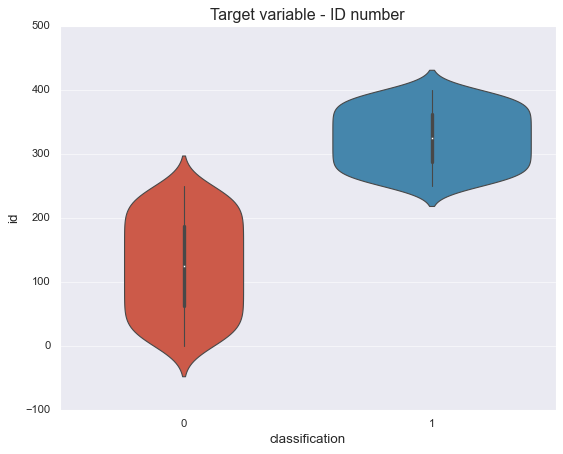

In [17]:
sns.violinplot(x ='classification', y ='id', data = df).set_title('Target variable - ID number');

**Observations**:
* Seems like correlation b/w these two variables because data isn't shuffled
* Hence, fist half of data is `ckd` and around after 200th ID class is `nckd`
* Now that the reason is clarified, I think it's safe to drop this column

In [26]:
df.drop(columns='id', axis=1, inplace=True)

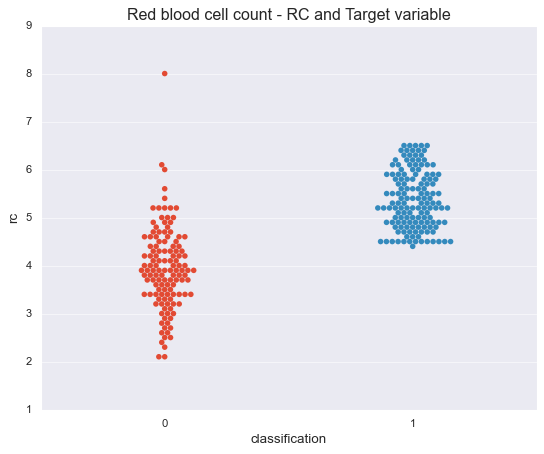

In [18]:
sns.swarmplot(x ='classification', y ='rc', data = df).set_title('Red blood cell count - RC and Target variable');

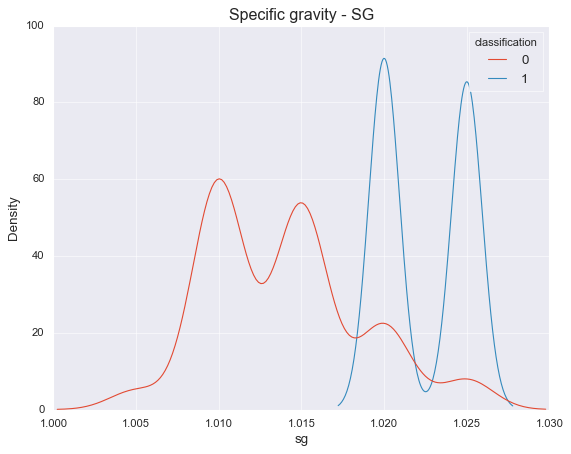

In [28]:
sns.kdeplot(hue ='classification', x ='sg', data = df).set_title('Specific gravity - SG');

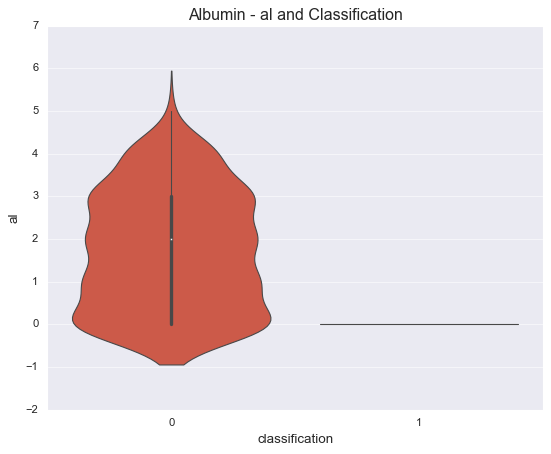

In [19]:
sns.violinplot(x ='classification', y ='al', data = df).set_title('Albumin - al and Classification');

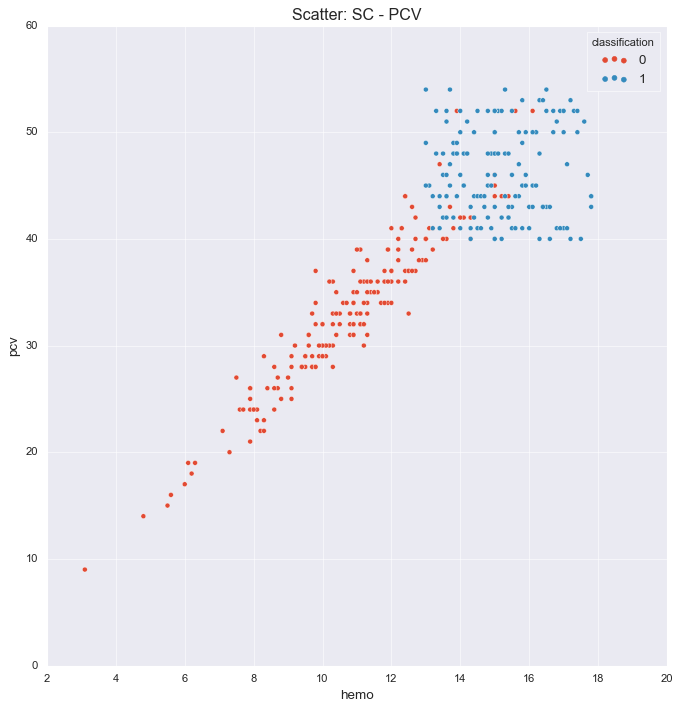

In [30]:
# packed cell volume - pcv
# serium creatinine - sc
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='hemo', y='pcv', hue='classification').set_title('Scatter: SC - PCV');

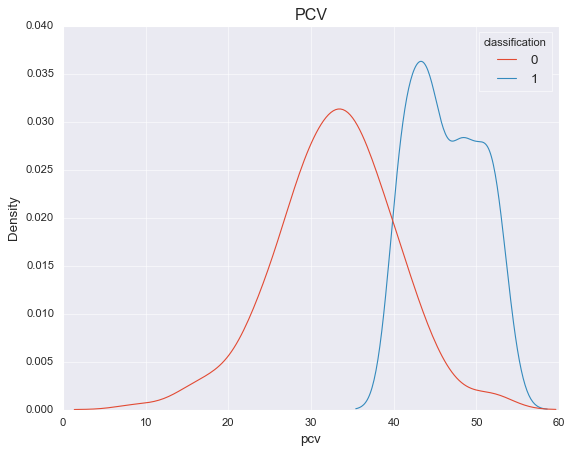

In [20]:
sns.kdeplot(data=df, x='pcv', hue='classification').set_title('PCV');

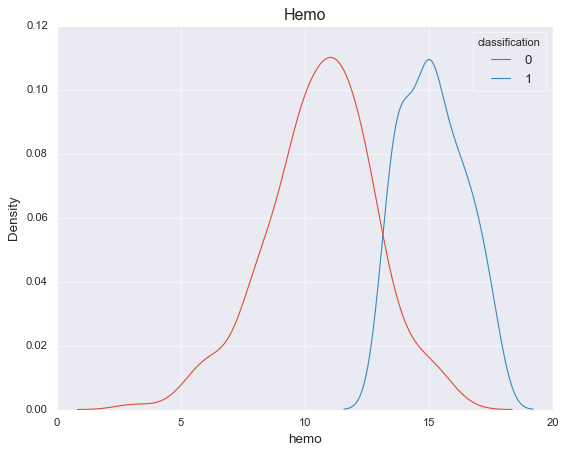

In [21]:
sns.kdeplot(data=df, x='hemo', hue='classification').set_title('Hemo');

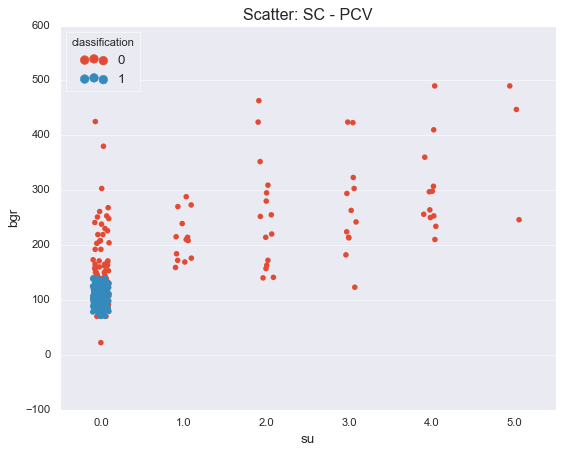

In [33]:
sns.stripplot(data=df, x='su', y='bgr', hue='classification').set_title('Scatter: SC - PCV');

* We can see that most unclassified targets has lowest numbers in `bgr` and `su` features  

### Pre-processing

In [34]:
#divide dependent and independent features
X = df.drop('classification', axis=1)
y = df.classification
numeric_features = X.describe().keys()
cat_features = X.describe(include='object').keys()

In [35]:
df.isna().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [36]:
X[numeric_features].isna().sum().sort_values(ascending=False)

rc      131
wc      106
pot      88
sod      87
pcv      71
hemo     52
su       49
sg       47
al       46
bgr      44
bu       19
sc       17
bp       12
age       9
dtype: int64

In [37]:
X[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
pot,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


To replace `NaN` values in numeric features, let's use median value

In [38]:
for col in numeric_features:
    X[col] = X[col].fillna(df[col].median())
X[numeric_features].isna().sum().all()

False

In [39]:
X[cat_features].isna().sum()

rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [40]:
X.describe(include='object').T

,count,unique,top,freq
rbc,248,2,normal,201
pc,335,2,normal,259
pcc,396,2,notpresent,354
ba,396,2,notpresent,374
htn,398,2,no,251
dm,398,2,no,261
cad,398,2,no,364
appet,399,2,good,317
pe,399,2,no,323
ane,399,2,no,339


For categorical features `mode` value has been choosen to replace `NaN` values

In [41]:
for col in cat_features:
    X[col] = X[col].fillna(df[col].mode()[0])
X[cat_features].isna().sum().all()

False

### Encoding

* Since there're only 2 unique values in each categorical column we can use label encoding.

In [42]:
for col in cat_features:
    X[col] = X[col].astype('category').cat.codes
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


### Modeling

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X[numeric_features].columns

vif_data["VIF"] = [variance_inflation_factor(X[numeric_features].values, i)
						for i in range(len(X[numeric_features].columns))]

print(vif_data.sort_values(by='VIF', ascending=False))

   feature         VIF
2       sg  542.203385
8      sod  431.118745
11     pcv   99.992273
10    hemo   89.426006
13      rc   68.700298
1       bp   37.673889
12      wc   12.951373
0      age   11.463743
5      bgr    8.470229
6       bu    5.105683
9      pot    4.591570
7       sc    3.068167
3       al    2.173037
4       su    2.082962


**Observations**:
* Since it's being said that if VIF score is higher than 5 - features are higly correlated
* From above, we can conclude that half of numeric features are highly correlated
* But, my guess, some features are expected to be correlated with others due to how our organism and all those stuff works
* Though, seems like PCA would be very nice to implement and thus get rid of multicolliniarity

#### I. Simple Modeling

Let's try few models, at first without tunning:
* Linear SVM
* Random Forest
* xgBoost

In [45]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

print("Accuracy score for Linear SVM:", accuracy_score(y_test, svm.predict(X_test)))
print(f"Classification Report :- \n {classification_report(y_test, svm.predict(X_test))}")

Accuracy score for Linear SVM: 0.5
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.25      0.39        53
           1       0.40      1.00      0.57        27

    accuracy                           0.50        80
   macro avg       0.70      0.62      0.48        80
weighted avg       0.80      0.50      0.45        80



In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print("Accuracy score for Logistic Regression:", accuracy_score(y_test, log_reg.predict(X_test)))
print(f"Classification Report :- \n {classification_report(y_test, log_reg.predict(X_test))}")

Accuracy score for Logistic Regression: 0.9
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        53
           1       0.77      1.00      0.87        27

    accuracy                           0.90        80
   macro avg       0.89      0.92      0.89        80
weighted avg       0.92      0.90      0.90        80



In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print("Accuracy score for RFC:", accuracy_score(y_test, rfc.predict(X_test)))
print(f"Classification Report :- \n {classification_report(y_test, rfc.predict(X_test))}")

Accuracy score for RFC: 1.0
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        27

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [48]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train)

print("Accuracy score for Extreme Gradient Boosting:", accuracy_score(y_test, xgb.predict(X_test)))
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

[16:41:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score for Extreme Gradient Boosting: 1.0
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        27

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



**Observations**:
* The best models without any fancy pre-processing work (e.g. PCA, Scaling, Normalization) are (as expected in our case) XGBoost Classifier and RFC
* Linear SVM has the worst perfomance (0.5 accuracy) and Logistic Regression has 0.9, which indicates, in my opinion, that if we'll do fancy pre-processing work on our data, last model will probably perform even better.